In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Loads in the data
file_path = 'filtered_flight_delays_with_percentage.csv'
flight_data = pd.read_csv(file_path)

# Creates a variable that defines a delayed flight as a flight that is more than 15 minutes late
flight_data['is_delayed'] = (flight_data['% arrival delay'] > 15).astype(int)

# Define the independent and dependent variables
X = flight_data[['year', 'month', 'carrier', 'airport']]
y = flight_data['is_delayed']

# Encode categorical variables
label_encoder = LabelEncoder()
X['carrier'] = label_encoder.fit_transform(X['carrier'])
X['airport'] = label_encoder.fit_transform(X['airport'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test_scaled)

/var/folders/nk/ldnxz9r57k10wrrg0pts2d4h0000gn/T/ipykernel_81767/2142722395.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['carrier'] = label_encoder.fit_transform(X['carrier'])
/var/folders/nk/ldnxz9r57k10wrrg0pts2d4h0000gn/T/ipykernel_81767/2142722395.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['airport'] = label_encoder.fit_transform(X['airport'])


In [2]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [3]:
# Display the decision tree rules
feature_names = X.columns
tree_rules = export_text(clf, feature_names=list(feature_names))
print(f"Decision Tree Rules:\n{tree_rules}")

Decision Tree Rules:
|--- carrier <= -0.73
|   |--- airport <= -0.41
|   |   |--- year <= 1.70
|   |   |   |--- month <= -0.85
|   |   |   |   |--- class: 0
|   |   |   |--- month >  -0.85
|   |   |   |   |--- month <= 0.27
|   |   |   |   |   |--- month <= -0.29
|   |   |   |   |   |   |--- month <= -0.57
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- month >  -0.57
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- month >  -0.29
|   |   |   |   |   |   |--- year <= -0.79
|   |   |   |   |   |   |   |--- month <= -0.01
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- month >  -0.01
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- year >  -0.79
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- month >  0.27
|   |   |   |   |   |--- month <= 1.11
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- month >  1.11
|   |   |   |   |   |   |--- year <= -0.37
|   |   |   | 

In [4]:
# Display full classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57        38
           1       0.82      0.90      0.86        99

    accuracy                           0.79       137
   macro avg       0.74      0.70      0.71       137
weighted avg       0.78      0.79      0.78       137



In [5]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[19 19]
 [10 89]]


In [6]:
# Analyze the effect of max_depth on the training and testing accuracy
train_accuracies = []
test_accuracies = []
depths = range(1, 21)  # Max depth of 20, for example
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_scaled, y_train)
    train_accuracies.append(clf.score(X_train_scaled, y_train))
    test_accuracies.append(clf.score(X_test_scaled, y_test))

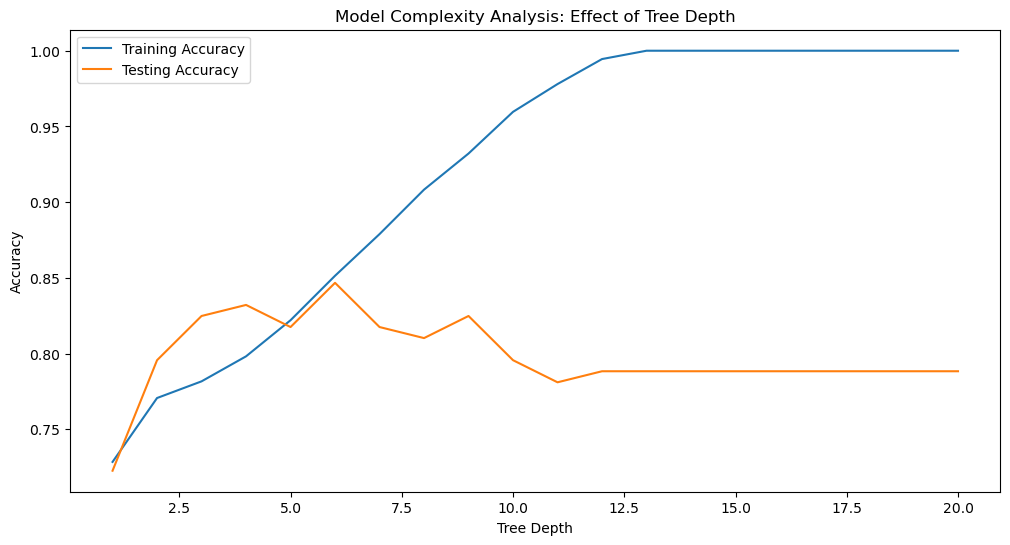

In [7]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Model Complexity Analysis: Effect of Tree Depth')
plt.legend()
plt.show()

In [8]:
# User input for prediction
user_input = {}


print("Welcome to the Flight Delay Prediction App!")
print("Please enter the following information:")
# Input for year
user_input['year'] = int(input("Enter year: "))
while user_input['year'] not in range(2015, 2024):
    print("Invalid year. Please enter a value between 2015 and 2023.")
    user_input['year'] = int(input("Enter year: "))

# Input for month (1-12)
user_input['month'] = int(input("Enter value for month (1-12): "))
while user_input['month'] not in range(1, 13):
    print("Invalid month. Please enter a value between 1 and 12.")
    user_input['month'] = int(input("Enter value for month (1-12): "))

# Input for carrier
print("Enter value for carrier:")
print("Spirit Air Lines = NK   ", "  Southwest Airlines = WN   ","   Frontier Airlines = F9  "," Delta Airlines = DL")

valid_carriers = ['NK', 'WN', 'F9', 'DL']
user_input['carrier'] = input("Carrier code: ")
while user_input['carrier'] not in valid_carriers:
    print("Invalid carrier code. Please enter a valid code.")
    user_input['carrier'] = input("Carrier code: ")

# Input for airport
print("Enter value for airport:")
print("MIA = Miami   ", "   LAX = Los Angeles","   ATL = Atlanta")

valid_airports = ['MIA', 'LAX', 'ATL']
user_input['airport'] = input("Airport code: ")
while user_input['airport'] not in valid_airports:
    print("Invalid airport code. Please enter a valid code.")
    user_input['airport'] = input("Airport code: ")

# Create a DataFrame from user input
user_df = pd.DataFrame([user_input])

# Encode categorical variables in user input
user_df['carrier'] = label_encoder.transform([user_input['carrier']])[0] if user_input['carrier'] in label_encoder.classes_ else -1
user_df['airport'] = label_encoder.transform([user_input['airport']])[0] if user_input['airport'] in label_encoder.classes_ else -1

# Scale the user input
user_df_scaled = scaler.transform(user_df)

# Make predictions on the user input
user_prediction = clf.predict(user_df_scaled)

# Display the prediction
print(f"Predicted Delay Status: {'Delayed' if user_prediction[0] == 1 else 'Not delayed'}")

Welcome to the Flight Delay Prediction App!
Please enter the following information:
Enter year: 2023
Enter value for month (1-12): 8
Enter value for carrier:
Spirit Air Lines = NK      Southwest Airlines = WN       Frontier Airlines = F9    Delta Airlines = DL
Carrier code: WN
Enter value for airport:
MIA = Miami       LAX = Los Angeles    ATL = Atlanta
Airport code: ATL
Predicted Delay Status: Delayed
